# Linear Algebra and Scientific Computing Libraries
## Mehmet Gönen
## October 19, 2022

The main Python package for linear algebra is the SciPy subpackage scipy.linalg which builds on NumPy. Let us import both packages:

In [6]:
# load libraries
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as nla
import scipy.linalg as sla
import scipy.sparse as sp

ModuleNotFoundError: No module named 'matplotlib'

## Joining and splitting arrays

In [ ]:
# create two vectors
vector1 = np.array([1, 2, 3, 4])
vector2 = np.array([5, 6, 7, 8, 9])

In [ ]:
# combine two vectors
combined_vector = np.concatenate((vector1, vector2))
print(combined_vector)

[1 2 3 4 5 6 7 8 9]


In [ ]:
# create two matrices
matrix1 = np.array([[1, 2, 3],
                    [4, 5, 6],
                    [7, 8, 9]])
matrix2 = np.array([[2, 4, 6],
                    [8, 10, 12],
                    [14, 16, 18]])

In [ ]:
# combine two matrices horizontally
stacked_matrix = np.hstack((matrix1, matrix2))
print(stacked_matrix)

[[ 1  2  3  2  4  6]
 [ 4  5  6  8 10 12]
 [ 7  8  9 14 16 18]]


In [ ]:
# combine two matrices vertically
stacked_matrix = np.vstack((matrix1, matrix2))
print(stacked_matrix)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [ 2  4  6]
 [ 8 10 12]
 [14 16 18]]


## Saving an array into a file

In [ ]:
# create a matrix
written_matrix = np.array([[1, 2, 3],
                           [4, 5, 6],
                           [7, 8, 9]])

In [ ]:
# write matrix into a csv file
np.savetxt("matrix.csv", written_matrix, delimiter = ",")

## Loading an array from a file

In [ ]:
# load matrix from a csv file
read_matrix = np.loadtxt("matrix.csv", delimiter = ",")
print(read_matrix)

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


## Matrix operations and functions
### Arithmetic operations
Arithmetic array operations ```+```, ```-```, ```/```, ```*``` and ```**``` are performed elementwise on NumPy arrays. Let us create a NumPy array and do some computations:

In [ ]:
M = np.array([[3, 4],
              [-1, 5]])

print(M)
print(M * M)

[[ 3  4]
 [-1  5]]
[[ 9 16]
 [ 1 25]]


### Matrix multiplication
We use the ```numpy.matmul``` function or ```@``` operator to do matrix multiplication with NumPy arrays:

In [7]:
print(np.matmul(M, M))
print(M @ M)

NameError: name 'np' is not defined

Let us compute $\mathbf{R} = 2\mathbf{I} + 3\mathbf{A} - \mathbf{AB}$ for

$\begin{equation}\mathbf{A} = \begin{bmatrix}
1 & 3 \\
-1 & 7
\end{bmatrix}
\ \ \ \
\mathbf{B} = \begin{bmatrix}
5 & 2 \\
1 & 2
\end{bmatrix}\end{equation}$

and $\mathbf{I}$ is the identity matrix of size 2:

In [ ]:
A = np.array([[1, 3],
              [-1, 7]])
print(A)
B = np.array([[5, 2],
              [1, 2]])
print(B)
I = np.eye(2)
print(I)

[[ 1  3]
 [-1  7]]
[[5 2]
 [1 2]]
[[1. 0.]
 [0. 1.]]


In [ ]:
R = 2 * I + 3 * A - np.matmul(A, B)
print(R)

[[-3.  1.]
 [-5. 11.]]


### Matrix powers
There is no symbol for matrix powers and so we must use the function ```matrix_power``` from the subpackage ```numpy.linalg```.

In [ ]:
print(nla.matrix_power(M, 2))
print(M @ M)

[[ 5 32]
 [-8 21]]
[[ 5 32]
 [-8 21]]


In [ ]:
print(nla.matrix_power(M, 5))
print(M @ M @ M @ M @ M)

[[-1525  3236]
 [ -809    93]]
[[-1525  3236]
 [ -809    93]]


### Tranpose
We can take the transpose with ```.T``` attribute:

In [ ]:
print(M)
print(M.T)

[[ 3  4]
 [-1  5]]
[[ 3 -1]
 [ 4  5]]


Notice that $\mathbf{M}\mathbf{M}^{\top}$ is a symmetric matrix:

In [8]:
print(M @ M.T)

NameError: name 'M' is not defined

### Inverse
We can find the inverse using the function ```scipy.linalg.inv```:

In [ ]:
A = np.array([[1, 2],
              [3, 4]])
print(A)
print(sla.inv(A))

print(A)
print(A @ sla.inv(A))
print(sla.inv(A) @ A)

[[1 2]
 [3 4]]
[[-2.   1. ]
 [ 1.5 -0.5]]
[[1 2]
 [3 4]]
[[1.0000000e+00 0.0000000e+00]
 [8.8817842e-16 1.0000000e+00]]
[[1.00000000e+00 0.00000000e+00]
 [1.11022302e-16 1.00000000e+00]]


### Trace
We can find the trace of a matrix using the function ```numpy.trace```:

In [ ]:
print(np.trace(A))

5


### Determinant
We find the determinant using the function ```scipy.linalg.det```:

In [ ]:
A = np.array([[1, 2],
              [3, 4]])
print(A)
print(sla.det(A))

[[1 2]
 [3 4]]
-2.0


## Solving linear systems
### Linear systems
A linear system of equations is a collection of linear equations

$\begin{align}
a_{0,0}x_0 + a_{0,1}x_1 + \cdots + a_{0,n}x_n & = b_0 \\
a_{1,0}x_0 + a_{1,1}x_1 + \cdots + a_{1,n}x_n & = b_1 \\
& \vdots \\
a_{m,0}x_0 + a_{m,1}x_1 + \cdots + a_{m,n}x_n & = b_m \\
\end{align}$

In matrix notation, a linear system is $\mathbf{A} \boldsymbol{x} = \boldsymbol{b}$ where

$\mathbf{A} = \begin{bmatrix}
a_{0,0} & a_{0,1} & \cdots & a_{0,n} \\
a_{1,0} & a_{1,1} & \cdots & a_{1,n} \\
\vdots & & & \vdots \\
a_{m,0} & a_{m,1} & \cdots & a_{m,n} \\
\end{bmatrix}, \ \ \ \ 
\boldsymbol{x} = \begin{bmatrix}
x_0 \\ x_1 \\ \vdots \\ x_n
\end{bmatrix}, \ \ \ \ 
\boldsymbol{b} = \begin{bmatrix}
b_0 \\ b_1 \\ \vdots \\ b_m
\end{bmatrix}$

We are mostly interested in linear systems $\mathbf{A} \boldsymbol{x} = \boldsymbol{b}$ where there is a unique solution $\boldsymbol{x}$. This is the case when $\mathbf{A}$ is a square matrix ($m = n$) and 
$\det(\mathbf{A}) \neq 0$. To solve such a system, we can use the function ```scipy.linalg.solve```.

The function returns a solution of the system of equations $\mathbf{A} \boldsymbol{x} = \boldsymbol{b}$. For example:

In [ ]:
A = np.array([[1, 1],
              [1, -1]])
print(A)
b = np.array([2,0])
print(b)
x = sla.solve(A, b)
print(x)

[[ 1  1]
 [ 1 -1]]
[2 0]
[1. 1.]


Note that the output is returned as a 1D NumPy array when the vector $\boldsymbol{b}$ (the right hand side) is entered as a 1D NumPy array. If we input $\boldsymbol{b}$ as a 2D NumPy array, then the output is a 2D NumPy array. For example:

In [ ]:
A = np.array([[1, 1],
              [1, -1]])
print(A)
b = np.array([[2],
              [0]])
print(b)
x = sla.solve(A, b)
print(x)

[[ 1  1]
 [ 1 -1]]
[[2]
 [0]]
[[1.]
 [1.]]


### Simple Example
Let us compute the solution of the system of equations

$\begin{align}
2x + y &= 1 \\
x + y &= 1
\end{align}$

Create the matrix of coefficients $\mathbf{A}$ and the vector $\boldsymbol{b}$:

In [ ]:
A = np.array([[2, 1],
              [1, 1]])
print(A)
b = np.array([[1],
              [1]])
print(b)

[[2 1]
 [1 1]]
[[1]
 [1]]


In [ ]:
x = sla.solve(A, b)
print(x)

[[0.]
 [1.]]


We can verify the solution by computing the inverse of $\mathbf{A}$:

In [ ]:
Ainv = sla.inv(A)
print(Ainv)

[[ 1. -1.]
 [-1.  2.]]


and multiply $\mathbf{A}^{-1}\boldsymbol{b}$ to solve for $\boldsymbol{x}$:

In [ ]:
x = np.matmul(Ainv, b)
print(x)

[[0.]
 [1.]]


### Inverse or solve
It is a bad idea to use the inverse $\mathbf{A}^{-1}$ to solve $\mathbf{A}\boldsymbol{x} = \boldsymbol{b}$ if $\mathbf{A}$ is large. It is too computationally expensive. Let us create a large random matrix $\mathbf{A}$ and vector $\boldsymbol{b}$ and compute the solution $\boldsymbol{x}$ in two ways:

In [ ]:
N = 1000
A = np.random.rand(N, N)
b = np.random.rand(N, 1)

Now we compare the speed of ```scipy.linalg.solve``` with ```scipy.linalg.inv```:

In [ ]:
%%timeit
x = sla.solve(A, b)

17 ms ± 522 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%%timeit
x = np.matmul(sla.inv(A), b)

38.9 ms ± 1.64 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Solving with ```scipy.linalg.solve``` is about twice as fast!

## Sparse matrices

### Introduction
(dense) matrix is:
- mathematical object
- data structure for storing a 2D array of values

important features:
- memory allocated once for all items
    - usually a contiguous chunk, think NumPy ndarray
- fast access to individual items



### Why sparse matrices?
- the memory, that grows like n**2
- small example (double precision matrix):

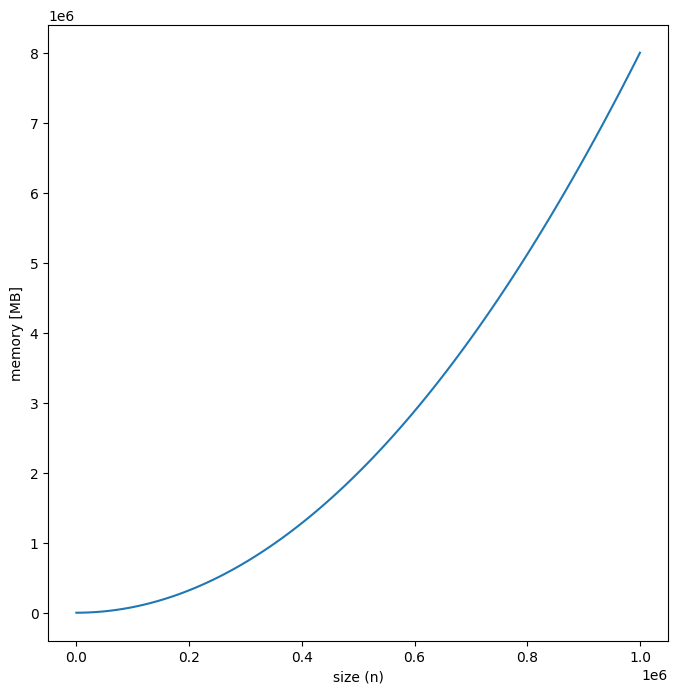

In [ ]:
x = np.linspace(0, 1e6, 100)

plt.figure(figsize = (8, 8))
plt.plot(x, 8.0 * (x**2) / 1e6)    
plt.xlabel("size (n)")    
plt.ylabel("memory [MB]")  
plt.show()

### Sparse matrices vs. sparse matrix storage schemes
- sparse matrix is a matrix, which is *almost empty*
- storing all the zeros is wasteful -> store only nonzero items
- think **compression**
- pros: huge memory savings
- cons: depends on actual storage scheme

### Storage schemes
- seven sparse matrix types in scipy.sparse:
    1. csc_matrix: Compressed Sparse Column format
    2. csr_matrix: Compressed Sparse Row format
    3. bsr_matrix: Block Sparse Row format
    4. lil_matrix: List of Lists format
    5. dok_matrix: Dictionary of Keys format
    6. coo_matrix: COOrdinate format (aka IJV, triplet format)
    7. dia_matrix: DIAgonal format
- each suitable for some tasks

### Common Methods
- all scipy.sparse classes are subclasses of **spmatrix**
    - default implementation of arithmetic operations
        - always converts to CSR
        - subclasses override for efficiency
    - shape, data type set/get
    - nonzero indices
    - format conversion, interaction with NumPy (*toarray()*, *todense()*)
- attributes:
    - *mtx.A* - same as mtx.toarray()
    - *mtx.T* - transpose (same as mtx.transpose())
    - *mtx.size* - the number of nonzeros (same as self.getnnz())
    - *mtx.shape* - the number of rows and columns (tuple)
- data usually stored in NumPy arrays

### Compressed sparse row format (CSR)
- row oriented
    - three NumPy arrays: indices, indptr, data
        - indices is array of column indices
        - data is array of corresponding nonzero values
        - indptr points to row starts in indices and data        
- fast matrix vector products and other arithmetics (sparsetools)
- constructor accepts:
    - dense matrix (array)
    - sparse matrix
    - shape tuple (create empty matrix)
    - (data, ij) tuple
    - (data, indices, indptr) tuple
- efficient row slicing, row-oriented operations
- slow column slicing, expensive changes to the sparsity structure

In [ ]:
# create empty CSR matrix:
mtx = sp.csr_matrix((3, 4), dtype = np.int8)
print(mtx.toarray())

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


In [ ]:
# create using (data, ij) tuple:
row = np.array([0, 0, 1, 2, 2, 2])
col = np.array([0, 2, 2, 0, 1, 2])
data = np.array([1, 2, 3, 4, 5, 6])
mtx = sp.csr_matrix((data, (row, col)), shape = (3, 3))

print(mtx)

print(mtx.toarray())

print(mtx.data)

print(mtx.indices)

print(mtx.indptr)

  (0, 0)	1
  (0, 2)	2
  (1, 2)	3
  (2, 0)	4
  (2, 1)	5
  (2, 2)	6
[[1 0 2]
 [0 0 3]
 [4 5 6]]
[1 2 3 4 5 6]
[0 2 2 0 1 2]
[0 2 3 6]


In [ ]:
# create using (data, indices, indptr) tuple:
data = np.array([1, 2, 3, 4, 5, 6])
indices = np.array([0, 2, 2, 0, 1, 2])
indptr = np.array([0, 2, 3, 6])
mtx = sp.csr_matrix((data, indices, indptr), shape=(3, 3))

print(mtx)

print(mtx.toarray())

print(mtx.data)

print(mtx.indices)

print(mtx.indptr)

  (0, 0)	1
  (0, 2)	2
  (1, 2)	3
  (2, 0)	4
  (2, 1)	5
  (2, 2)	6
[[1 0 2]
 [0 0 3]
 [4 5 6]]
[1 2 3 4 5 6]
[0 2 2 0 1 2]
[0 2 3 6]


### Visualizing sparse matrices
You can use ```spy``` function in ```matplotlib``` package.

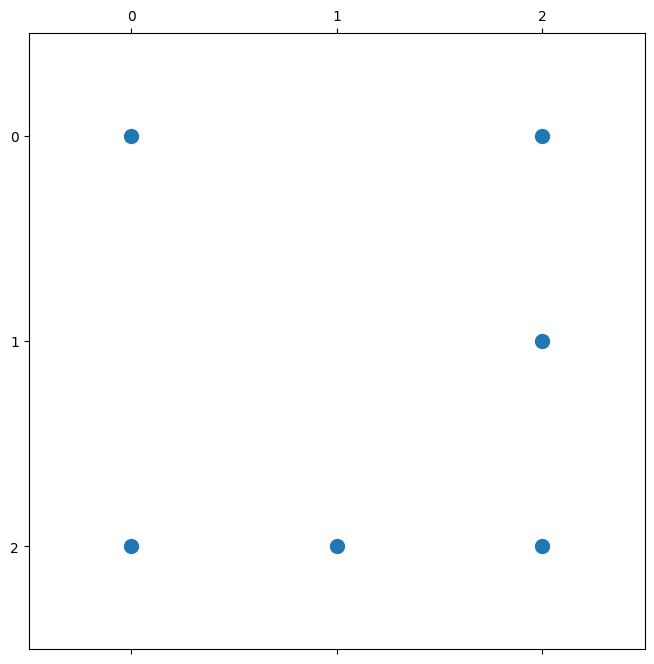

In [ ]:
plt.figure(figsize = (8, 8))
plt.spy(mtx, marker = "o")
plt.show()

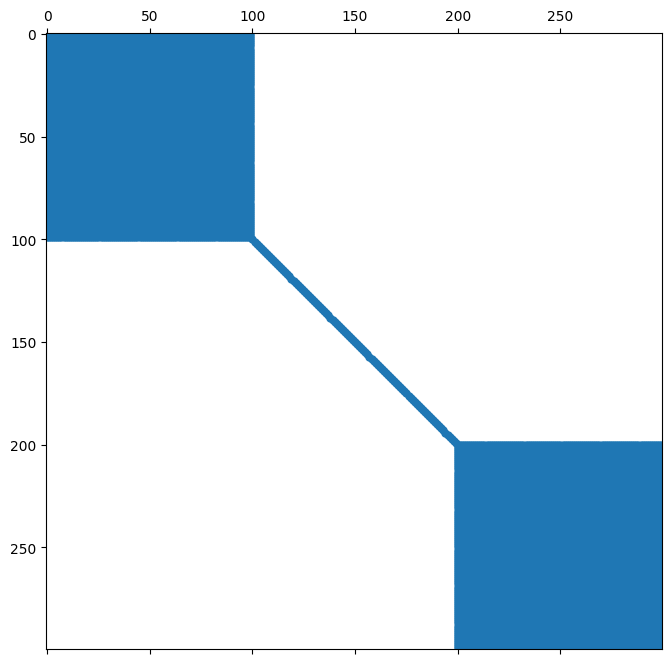

In [ ]:
A = np.ones((100, 100))
B = np.eye(100, 100)
C = np.ones((100, 100))
mtx = sp.block_diag((A, B, C))

plt.figure(figsize = (8, 8))
plt.spy(mtx, marker = ".")
plt.show()